In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
import scipy.stats as stats
import datetime as dt
import sklearn
from sklearn.preprocessing import MinMaxScaler

# read dataset 
df = pd.read_csv('all_features_by_state.csv')


In [2]:
# inspect first 5 rows
df.head()

,Unnamed: 0,CensusTract,State_x,HUNVFlag_x,LILATracts_1And10_x,LILATracts_halfAnd10_x,LILATracts_Vehicle_x,LATracts1_y,LATracts10_y,LATracts20_y,...,B08202_020E_diff,B08137_002E_diff,B19326_001E_diff,B19301_001E_diff,B19131_002E_diff,B19131_003E_diff,B19126_001E_diff,B03002_009E_diff,B03002_010E_diff,B03002_011E_diff
0,1400000US02013000100,2013000100,Alaska,1,1,1,1,1,1,1,...,35,378,3051.0,6329.0,159,72,2663.0,-46,0,-46
1,1400000US02016000100,2016000100,Alaska,0,1,1,1,1,1,1,...,13,146,-2816.0,-9929.0,34,22,-1354.0,-35,0,-35
2,1400000US02016000200,2016000200,Alaska,0,0,0,0,1,0,0,...,52,322,6177.0,6451.0,246,152,4327.0,117,0,117
3,1400000US02020000101,2020000101,Alaska,0,0,0,0,1,0,0,...,-104,-143,-6171.0,6711.0,-107,-13,NaN,359,0,359
4,1400000US02020000102,2020000102,Alaska,0,0,0,0,1,0,0,...,45,369,-7766.0,-2535.0,194,57,9355.0,117,0,117


In [3]:
# check the columns 
list(df.columns)

['Unnamed: 0',
 'CensusTract',
 'State_x',
 'HUNVFlag_x',
 'LILATracts_1And10_x',
 'LILATracts_halfAnd10_x',
 'LILATracts_Vehicle_x',
 'LATracts1_y',
 'LATracts10_y',
 'LATracts20_y',
 'LATracts_half_y',
 'LATracts1_x',
 'LATracts10_x',
 'LATracts20_x',
 'LATracts_half_x',
 'LILATracts_1And20_x',
 'HUNVFlag_y',
 'LILATracts_1And10_y',
 'LILATracts_halfAnd10_y',
 'LILATracts_Vehicle_y',
 'LILATracts_1And20_y',
 'entropy_index10_y',
 'entropy_index15_x',
 'HUNVFlag_diff',
 'LILATracts_1And10_diff',
 'LILATracts_halfAnd10_diff',
 'LILATracts_Vehicle_diff',
 'LILATracts_1And20_diff',
 'LATracts1_diff',
 'LATracts10_diff',
 'LATracts20_diff',
 'LATracts_half_diff',
 'Unnamed: 0_x',
 'STATE2010',
 'NAME2010',
 'B01001_001E2010',
 'B01001_002E2010',
 'B01001_026E2010',
 'B01002_001E2010',
 'B01003_001E2010',
 'B19037_001E2010',
 'B19001_001E2010',
 'B17023_001E2010',
 'B17020A_014E2010',
 'B08303_002E2010',
 'B08303_010E2010',
 'B08301_010E2010',
 'B08301_002E2010',
 'B08202_004E2010',
 'B082

# Cases

In [4]:
# low access 1 and 10 miles
no_desert = df[df['LATracts10_diff'] == -1]

# same situation 
same_access = df[df['LATracts10_diff'] == 0]

# food desert appeared
yes_desert = df[df['LATracts10_diff'] == 1]

In [5]:
# counts 
print('places where food desert disappeared', no_desert.shape) 

print('places where no change in food desert', same_access.shape)

print('places where food desert appeared', yes_desert.shape)

places where food desert disappeared (462, 117)
places where no change in food desert (63841, 117)
places where food desert appeared (270, 117)


In [6]:
# see states represented where food desert disappeared
no_desert['State_x'].unique()

array(['Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont'], dtype=object)

In [7]:
# low access disappeared 
def no_desert(row):
    if row['LATracts10_diff'] == -1:
        return 1
    else: 
        return 0 

# apply created function
df['disappeared_food_desert'] = df.apply(no_desert, axis=1)

In [8]:

# , 'B01001_002E_diff','B01001_026E_diff','B01002_001E_diff',
#                'B01003_001E_diff','B19037_001E_diff','B19001_001E_diff','B17023_001E_diff',
#                'B17020A_014E_diff','B08303_002E_diff','B08303_010E_diff','B08301_010E_diff',
#                'B08301_002E_diff','B08202_004E_diff','B08202_020E_diff','B08137_002E_diff',
#                'B19326_001E_diff','B19301_001E_diff','B19131_002E_diff','B19131_003E_diff',
#                'B19126_001E_diff','B03002_009E_diff','B03002_010E_diff','B03002_011E_diff'

# Standardize the features

In [9]:
scaler = MinMaxScaler()

scaler.fit(df['B01001_002E_diff'])
df['B01001_002E_diff'] = scaler.transform(df['B01001_002E_diff'])

ValueError: Expected 2D array, got 1D array instead:
array=[-464. -678. -710. ...  -13. -332.  305.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Note: 

Add the _diff variables to the corr matrix! 

In [10]:
# this looks at the correlation between all the subitems of engagement item
corrMatrix = df[['disappeared_food_desert', 'B01001_001E2015','B01001_002E2015','B01001_026E2015',
                 'B01002_001E2015','B01003_001E2015','B19037_001E2015','B19001_001E2015',
                 'B17023_001E2015','B17020A_014E2015']].corr()
print(round(corrMatrix, 2))

                         disappeared_food_desert  B01001_001E2015  \
disappeared_food_desert                     1.00            -0.03   
B01001_001E2015                            -0.03             1.00   
B01001_002E2015                            -0.02             0.98   
B01001_026E2015                            -0.03             0.98   
B01002_001E2015                             0.00             0.01   
B01003_001E2015                            -0.03             1.00   
B19037_001E2015                            -0.03             0.90   
B19001_001E2015                            -0.03             0.90   
B17023_001E2015                            -0.01             0.93   
B17020A_014E2015                           -0.01             0.78   

                         B01001_002E2015  B01001_026E2015  B01002_001E2015  \
disappeared_food_desert            -0.02            -0.03             0.00   
B01001_001E2015                     0.98             0.98             0.01   
B01001

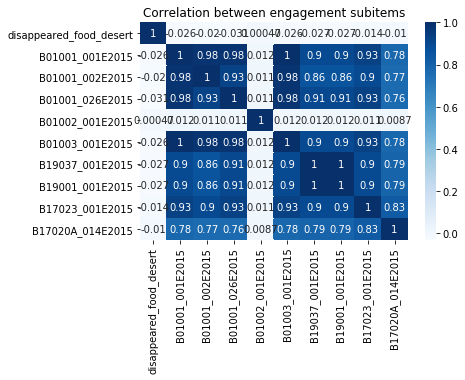

In [11]:
# visualize matrix 
sb.heatmap(corrMatrix, annot = True, cmap = "Blues")
plt.title("Correlation between engagement subitems")
plt.show()

In [12]:
# this looks at the correlation between all the subitems of engagement item
corrMatrix2 = df[['disappeared_food_desert','B19131_002E2015','B19131_003E2015','B19126_001E2015','B03002_009E2015',
                  'B03002_010E2015','B03002_011E2015', 'B08303_002E2015', 'entropy_index15_x']].corr()
print(round(corrMatrix2, 2)) 
 

                         disappeared_food_desert  B19131_002E2015  \
disappeared_food_desert                     1.00            -0.00   
B19131_002E2015                            -0.00             1.00   
B19131_003E2015                            -0.02             0.89   
B19126_001E2015                            -0.00             0.18   
B03002_009E2015                            -0.02             0.28   
B03002_010E2015                            -0.01             0.10   
B03002_011E2015                            -0.02             0.27   
B08303_002E2015                             0.03             0.18   
entropy_index15_x                          -0.07            -0.14   

                         B19131_003E2015  B19126_001E2015  B03002_009E2015  \
disappeared_food_desert            -0.02            -0.00            -0.02   
B19131_002E2015                     0.89             0.18             0.28   
B19131_003E2015                     1.00             0.14             0.31 

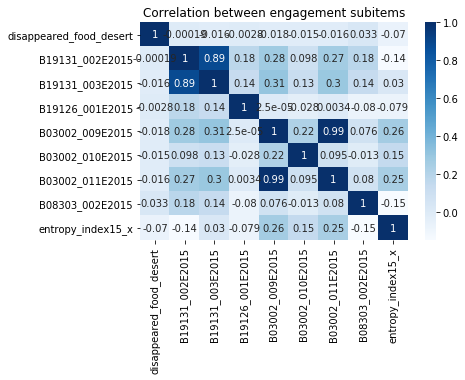

In [13]:
# visualize matrix 
sb.heatmap(corrMatrix2, annot = True, cmap = "Blues")
plt.title("Correlation between engagement subitems")
plt.show()

In [14]:
# this looks at the correlation between all the subitems of engagement item
corrMatrix3 = df[['disappeared_food_desert','B19131_002E2015','B19131_003E2015','B19126_001E2015','B03002_009E2015',
                  'B03002_010E2015','B03002_011E2015', 'B08303_002E2015', 'entropy_index15_x']].corr()
print(round(corrMatrix3, 2)) 
 

                         disappeared_food_desert  B19131_002E2015  \
disappeared_food_desert                     1.00            -0.00   
B19131_002E2015                            -0.00             1.00   
B19131_003E2015                            -0.02             0.89   
B19126_001E2015                            -0.00             0.18   
B03002_009E2015                            -0.02             0.28   
B03002_010E2015                            -0.01             0.10   
B03002_011E2015                            -0.02             0.27   
B08303_002E2015                             0.03             0.18   
entropy_index15_x                          -0.07            -0.14   

                         B19131_003E2015  B19126_001E2015  B03002_009E2015  \
disappeared_food_desert            -0.02            -0.00            -0.02   
B19131_002E2015                     0.89             0.18             0.28   
B19131_003E2015                     1.00             0.14             0.31 

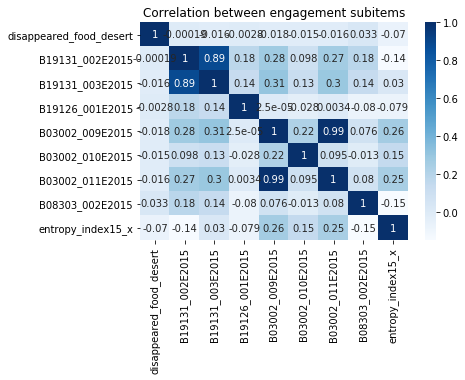

In [15]:
# visualize matrix 
sb.heatmap(corrMatrix3, annot = True, cmap = "Blues")
plt.title("Correlation between engagement subitems")
plt.show()

Notes:
- goal: what causes the change in food desert status?
- use 2010 data to do logit, predict 2015, but we have the answer 
- difference in difference -- can explain change for random -- not appropriate thoooo bc changes is not random 
- take differences, and predict based of the change 
- ind vars would be the change between 2015 and 2017 -- what scale the change needs to be on? 
- need to scale standardscaler to scale variables -- take difference and then scale the difference 
- absolute differences  vs indicator (dont need to scale indicator) 

In [16]:
# identify the independent variables 
ind_cols3 = ['B19131_002E2015','B19126_001E2015', 'B01001_001E2015', 'entropy_index15_x']
test  = ['B19131_002E2015','B03002_011E2015']
logit3 = sm.Logit(df['disappeared_food_desert'], sm.add_constant(df[test]), missing='drop')
result_inf2 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.042267
         Iterations 9


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
print(result_inf2.summary())

                              Logit Regression Results                             
Dep. Variable:     disappeared_food_desert   No. Observations:                64573
Model:                               Logit   Df Residuals:                    64570
Method:                                MLE   Df Model:                            2
Date:                     Sat, 23 Jan 2021   Pseudo R-squ.:                0.004847
Time:                             21:39:22   Log-Likelihood:                -2729.3
converged:                            True   LL-Null:                       -2742.6
Covariance Type:                 nonrobust   LLR p-value:                 1.687e-06
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.8210      0.091    -53.127      0.000      -4.999      -4.643
B19131_002E2015     0.0001   9.95e-05      1.504      0.133   -4.54e-05     

In [18]:
# log ods to prob -- google!

In [19]:
params = result_inf2.params
conf = result_inf2.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                       5%       95%  Odds Ratio
const            0.006746  0.009628    0.008059
B19131_002E2015  0.999955  1.000345    1.000150
B03002_011E2015  0.995805  0.998310    0.997057


vif -- matthew suggestion -- which features gives you the more problem w multilinearity 
-- after handpicking 